# Model Test #1:
* Did not remove or impute negative values from dataset
* Did not balance classes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import io, s3fs, json
pd.set_option('display.max_columns', None)
print('Program run at', dt.now())

Program run at 2021-05-31 19:52:51.974880


In [2]:
est = pd.read_csv('s3://bleeding-hearts/workingdata/merge_est.csv')
pct = pd.read_csv('s3://bleeding-hearts/workingdata/merge_pct.csv')
est.info()
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(1), int64(143), object(4)
memory usage: 20.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Columns: 148 entries, Unnamed: 0 to Child Opportunity Scores, overall COI, nationally-normed
dtypes: float64(102), int64(42), object(4)
memory usage: 20.6+ MB


In [3]:
for i in [est,pct]:
    #when we read in the data, it brings in a new col, Unnamed:0; dropping it.
    i.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
#column names are the same in est and pct
cols=list(est)
cat_cols=cols[-8:-5]
num_cols=cols[-4:]
print(cat_cols,'\n\n',num_cols)

['Child Opportunity Levels, education domain, nationally- normed', 'Child Opportunity Levels, health and environment domain, nationally-normed', 'Child Opportunity Levels, social and economic domain, nationally-normed'] 

 ['Child Opportunity Scores, education domain, nationally- normed', 'Child Opportunity Scores, health and environment domain, nationally-normed', 'Child Opportunity Scores, social and economic domain, nationally-normed', 'Child Opportunity Scores, overall COI, nationally-normed']


In [5]:
from pandas import plotting
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
import warnings
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)


from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
#Pipeline toolset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

#Model toolset
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

from sklearn.model_selection import train_test_split as tts

In [6]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

In [7]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='micro')))

In [8]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Very Low','Low','Moderate','High','Very High'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

ACS Estimate Data 
 Target = Child Opportunity Levels, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8365004393673111


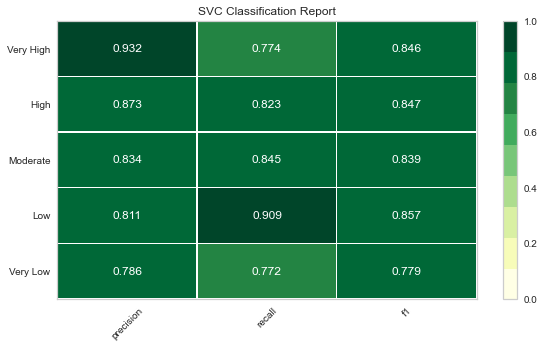

F1 SCORE NuSVC: 0.7839960456942003


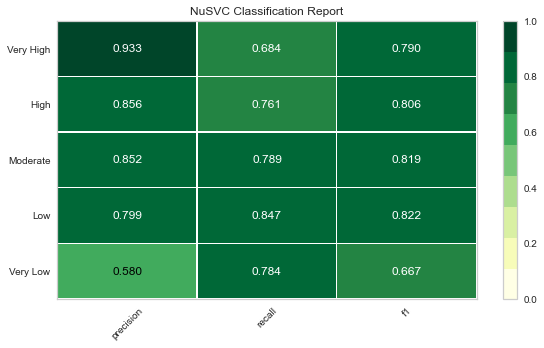

F1 SCORE LinearSVC: 0.7166630052724077


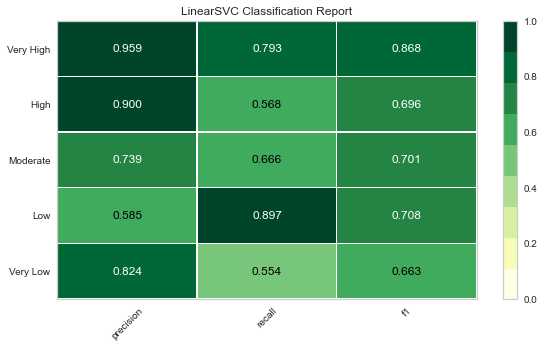

F1 SCORE SGDClassifier: 0.15740333919156416


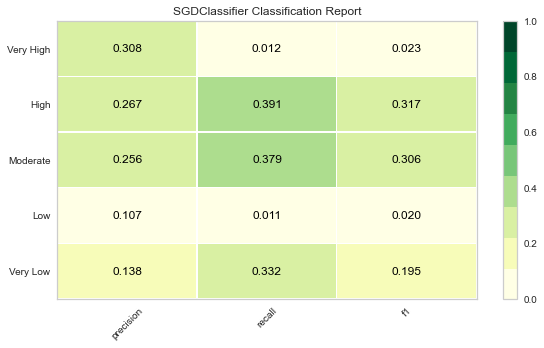

F1 SCORE KNeighborsClassifier: 0.6668497363796133


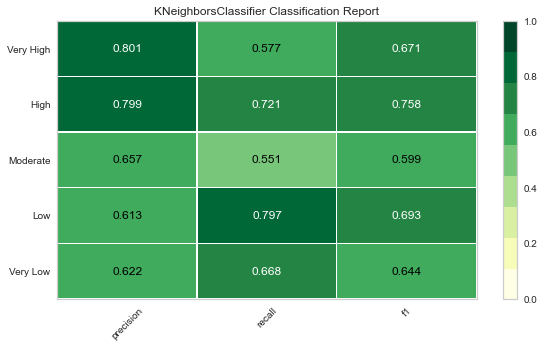

F1 SCORE LogisticRegression: 0.257743848857645


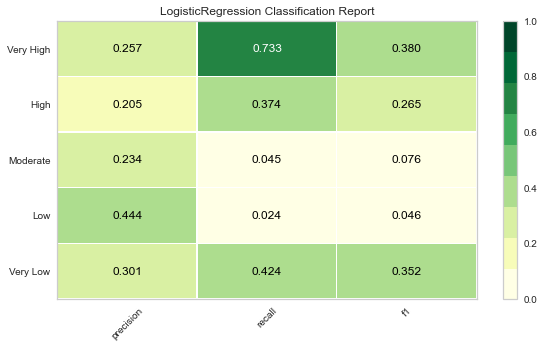

F1 SCORE LogisticRegressionCV: 0.2871265377855888


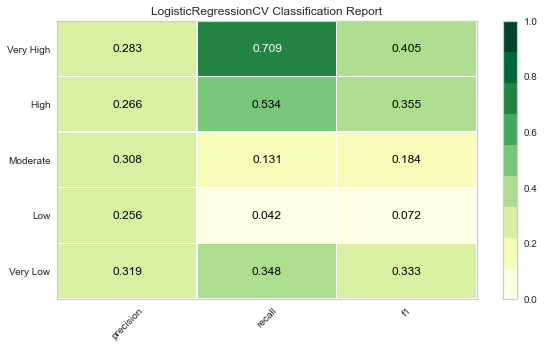

F1 SCORE BaggingClassifier: 1.0


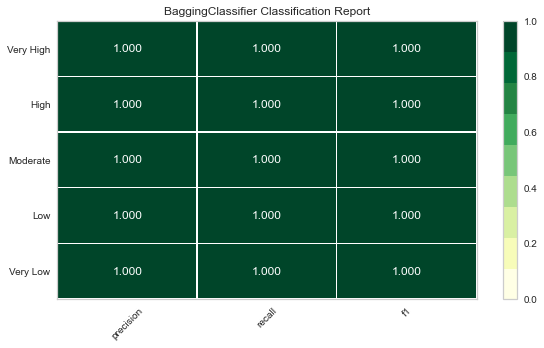

F1 SCORE ExtraTreesClassifier: 1.0


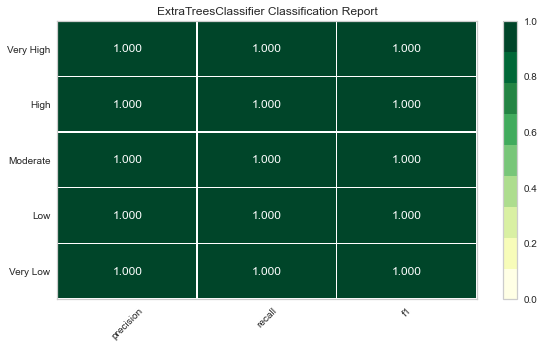

F1 SCORE RandomForestClassifier: 1.0


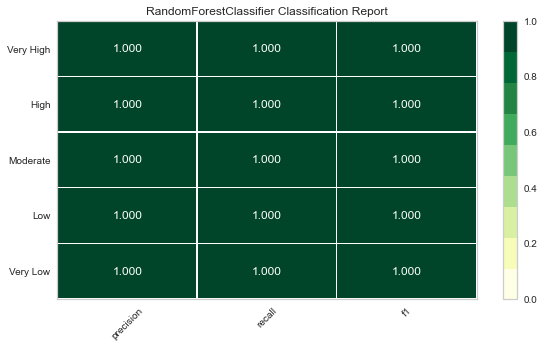

ACS Estimate Data 
 Target = Child Opportunity Levels, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8375439367311072


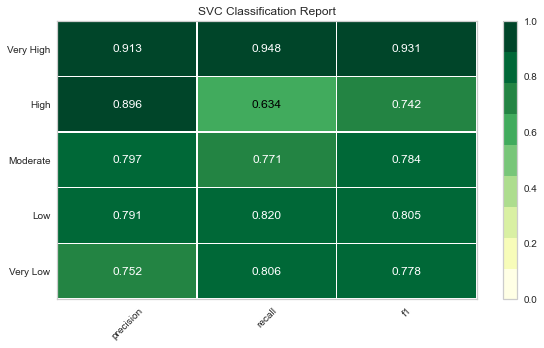

error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.7062829525483304


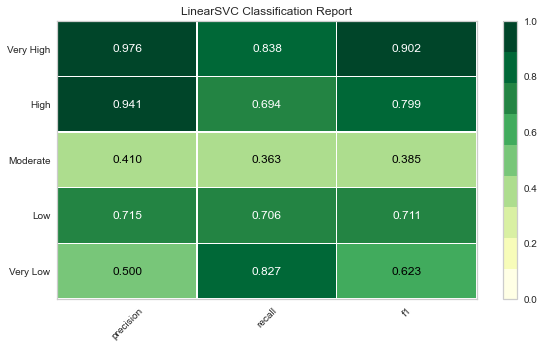

F1 SCORE SGDClassifier: 0.19903339191564148


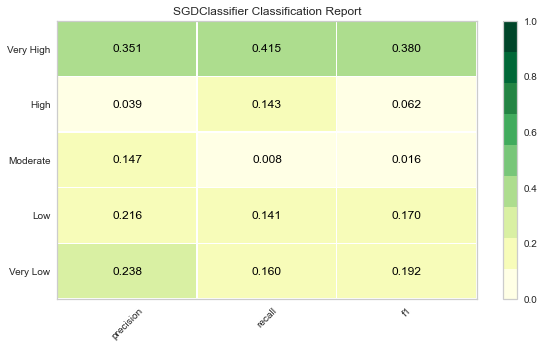

F1 SCORE KNeighborsClassifier: 0.656359841827768


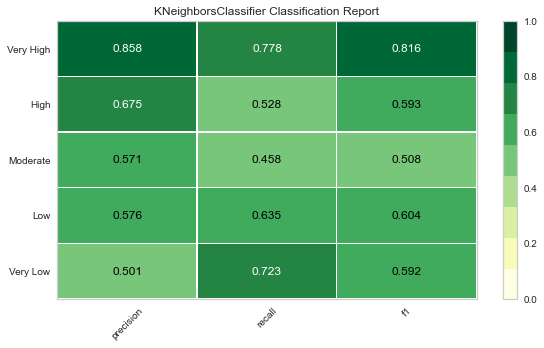

F1 SCORE LogisticRegression: 0.34193760984182775


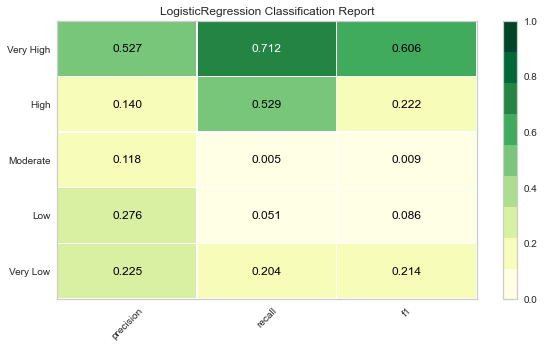

F1 SCORE LogisticRegressionCV: 0.31046792618629176


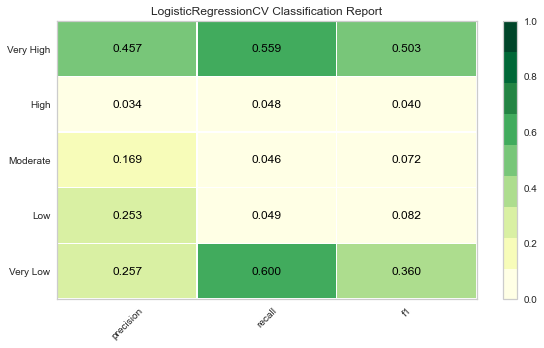

F1 SCORE BaggingClassifier: 1.0


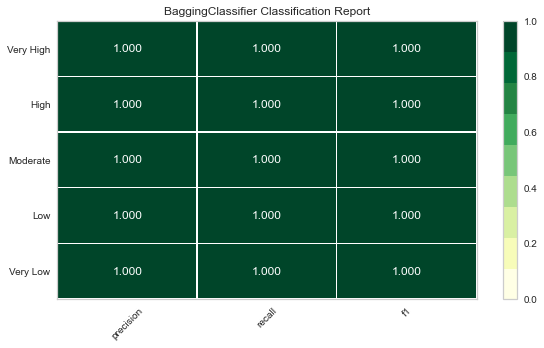

F1 SCORE ExtraTreesClassifier: 1.0


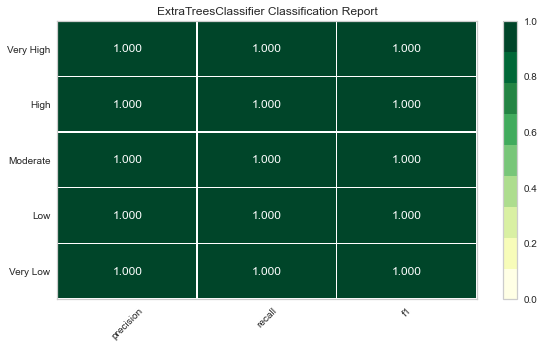

F1 SCORE RandomForestClassifier: 1.0


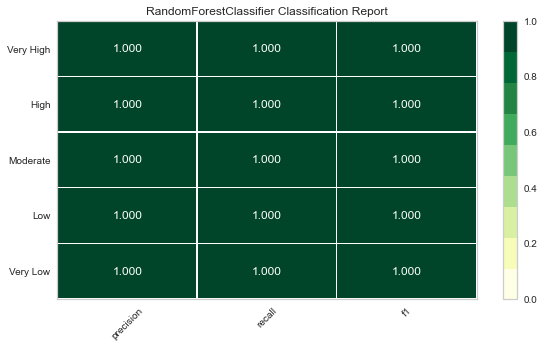

ACS Estimate Data 
 Target = Child Opportunity Levels, social and economic domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8134336555360281


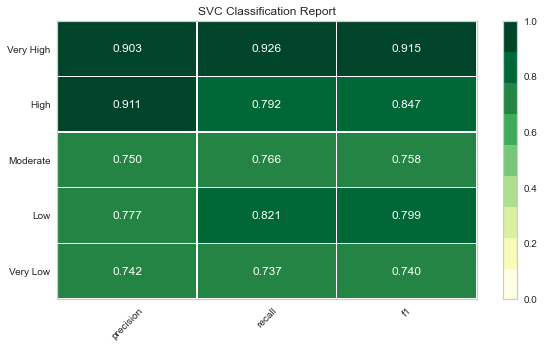

F1 SCORE NuSVC: 0.7458260105448155


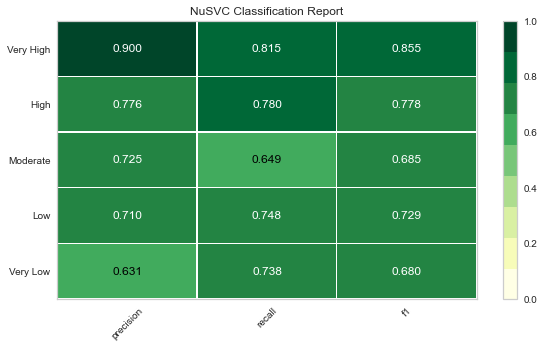

F1 SCORE LinearSVC: 0.7380272407732865


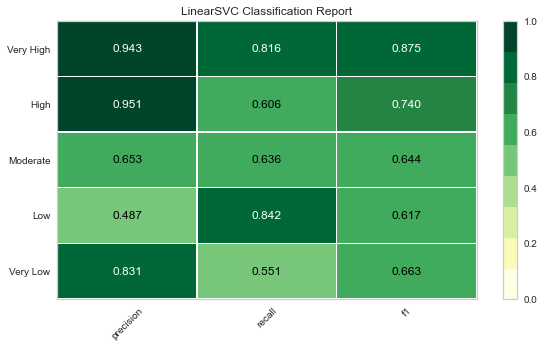

F1 SCORE SGDClassifier: 0.25356985940246046


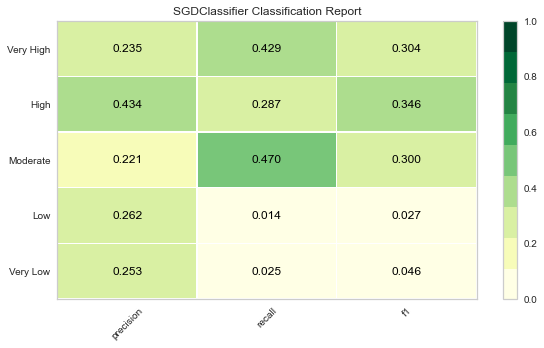

F1 SCORE KNeighborsClassifier: 0.7378075571177505


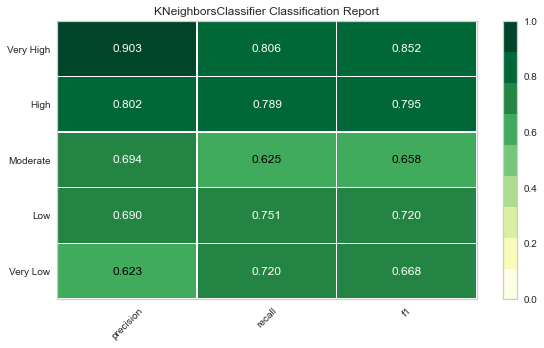

F1 SCORE LogisticRegression: 0.3381480667838313


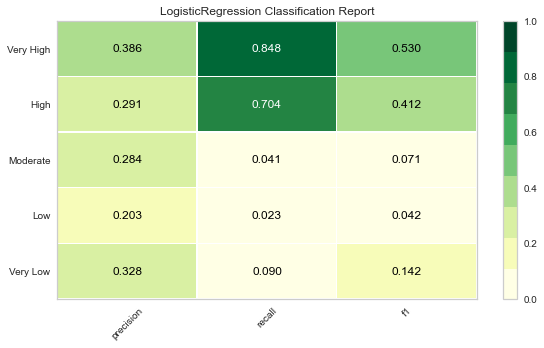

F1 SCORE LogisticRegressionCV: 0.3272188049209139


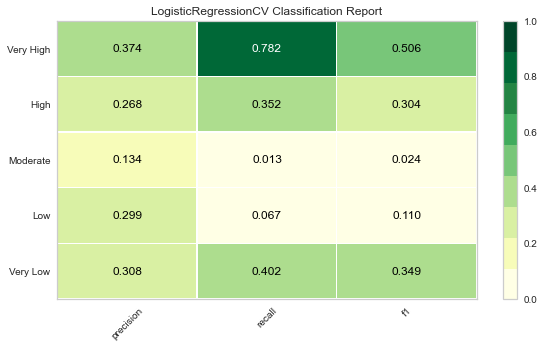

F1 SCORE BaggingClassifier: 1.0


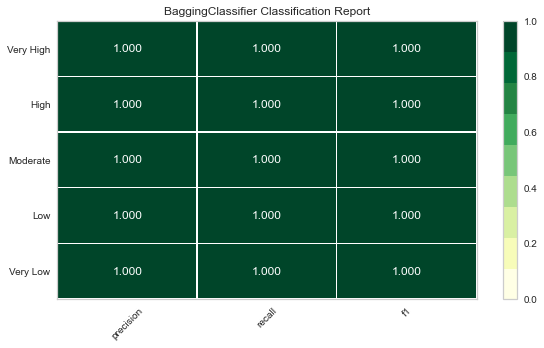

F1 SCORE ExtraTreesClassifier: 1.0


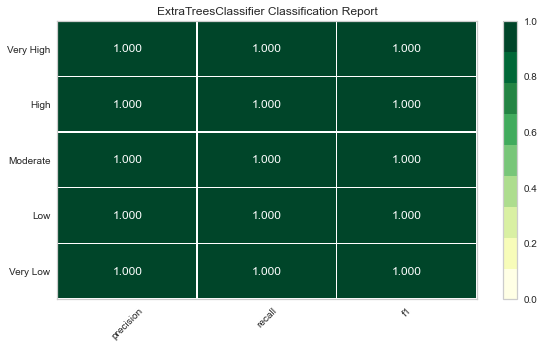

F1 SCORE RandomForestClassifier: 1.0


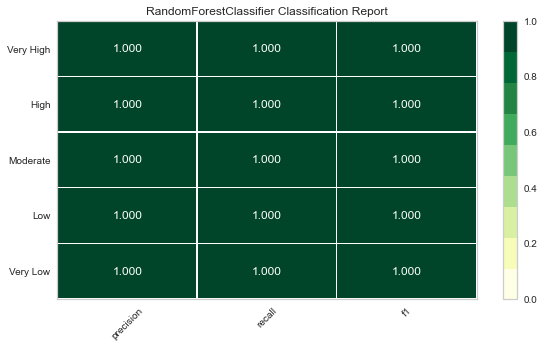

In [9]:
for i in cat_cols:
    X = est.loc[:, est.columns != i]
    y = est[i]
    print('ACS Estimate Data','\n','Target =', i)
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
            visualize_model(X, y, model)
        except:
            print("error in",model)

In [10]:
for i in num_cols:
    X = est.loc[:, est.columns != i]
    y = est[i]
    print('ACS Estimate Data','\n','Target =', i)
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
        except:
            print("error in",model)

ACS Estimate Data 
 Target = Child Opportunity Scores, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.24719903339191565
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.1945298769771529
F1 SCORE SGDClassifier: 0.011698154657293498
F1 SCORE KNeighborsClassifier: 0.2536797012302285
F1 SCORE LogisticRegression: 0.015927065026362038
F1 SCORE LogisticRegressionCV: 0.018343585237258347
F1 SCORE BaggingClassifier: 0.9947825131810193
F1 SCORE ExtraTreesClassifier: 1.0
F1 SCORE RandomForestClassifier: 1.0
ACS Estimate Data 
 Target = Child Opportunity Scores, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.26092926186291737
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.19782513181019334
F1 SCORE SGDClassifier: 0.0063708260105448155
F1 SCORE KNeighborsClassifier: 0.2787236379613357
F1 SCORE LogisticRegression: 0.02625219683655536
F1 SCORE LogisticRegressionCV: 0.026801405975395435
F1

ACS Percent Data 
 Target = Child Opportunity Levels, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.7979459578207382


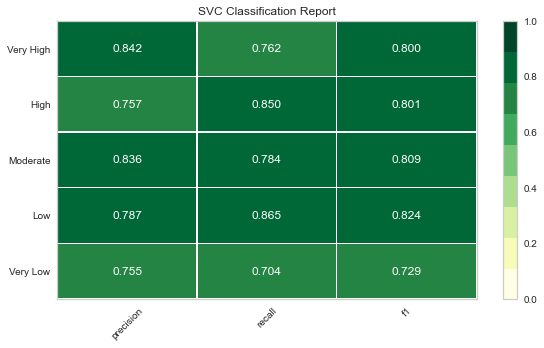

F1 SCORE NuSVC: 0.7540641476274166


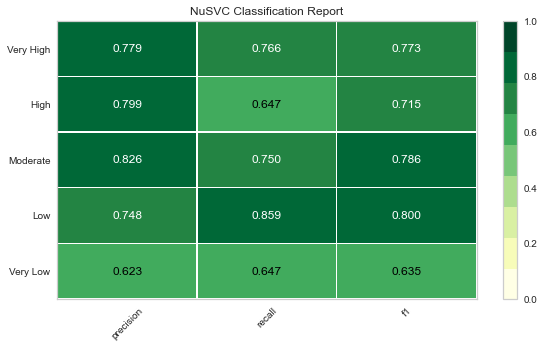

F1 SCORE LinearSVC: 0.7205623901581721


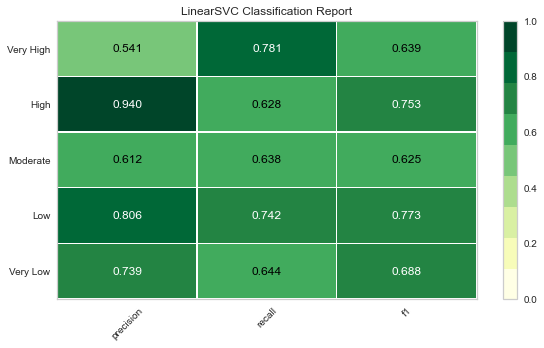

F1 SCORE SGDClassifier: 0.24071836555360282


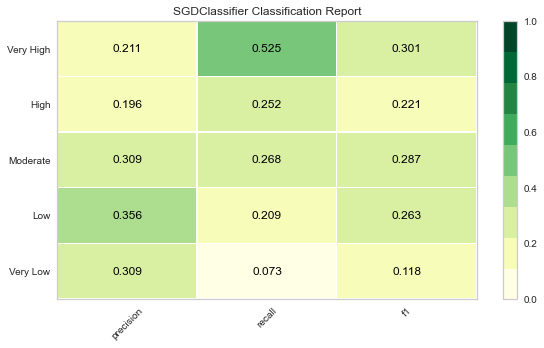

F1 SCORE KNeighborsClassifier: 0.6607535149384886


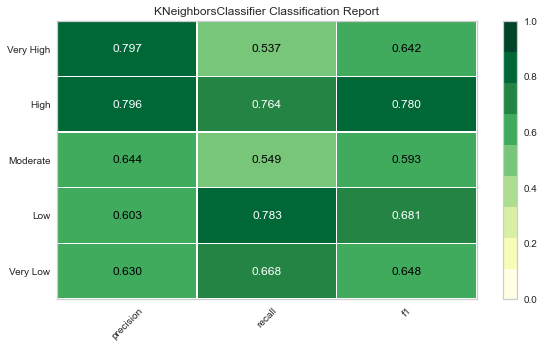

F1 SCORE LogisticRegression: 0.24187170474516695


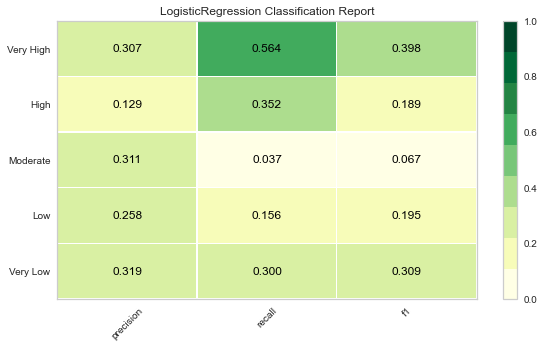

F1 SCORE LogisticRegressionCV: 0.2634556239015817


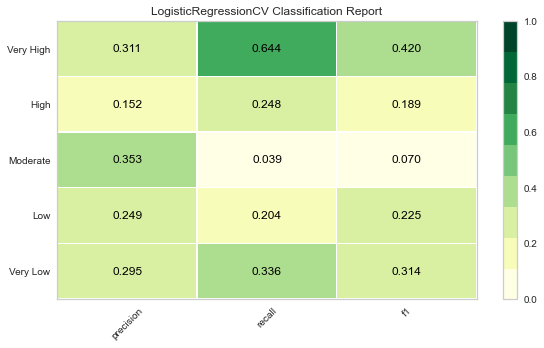

F1 SCORE BaggingClassifier: 1.0


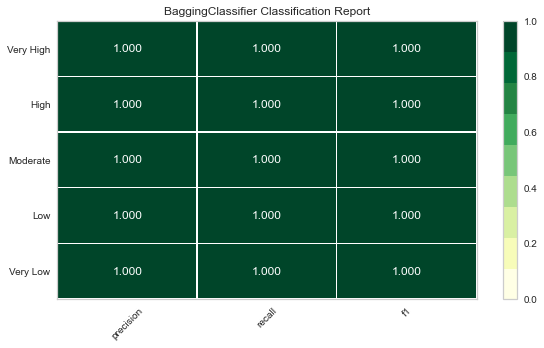

F1 SCORE ExtraTreesClassifier: 1.0


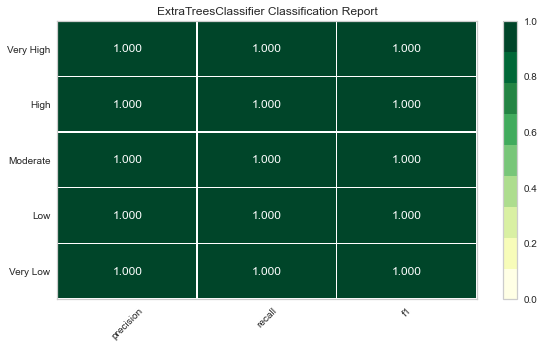

F1 SCORE RandomForestClassifier: 1.0


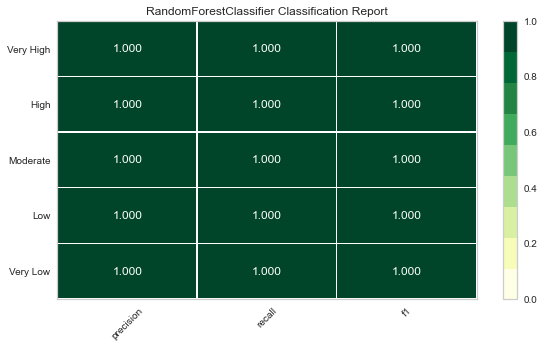

ACS Percent Data 
 Target = Child Opportunity Levels, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.8031085237258347


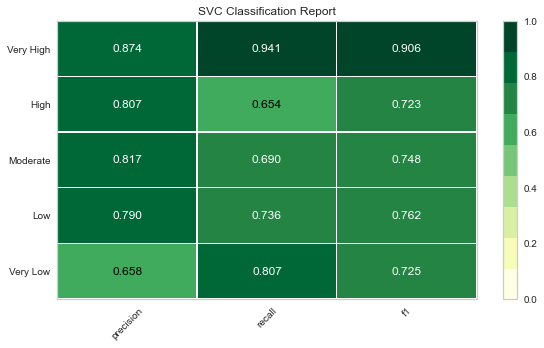

error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.7056239015817223


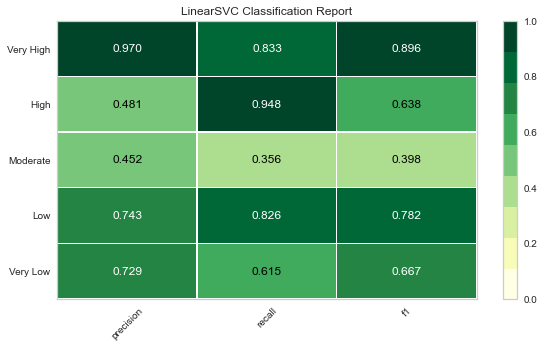

F1 SCORE SGDClassifier: 0.2312170474516696


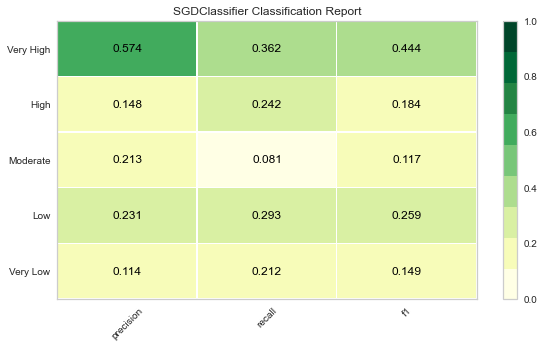

F1 SCORE KNeighborsClassifier: 0.6461445518453427


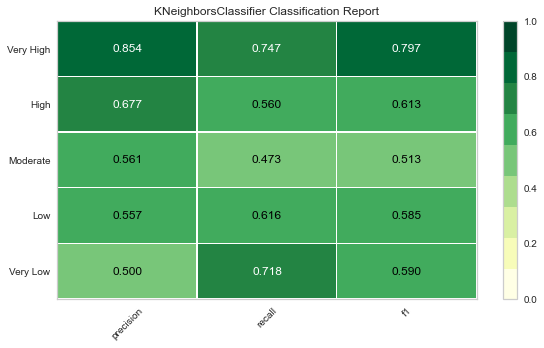

F1 SCORE LogisticRegression: 0.25494288224956063


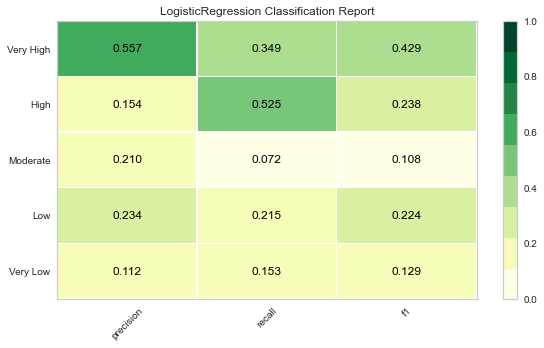

F1 SCORE LogisticRegressionCV: 0.24725395430579966


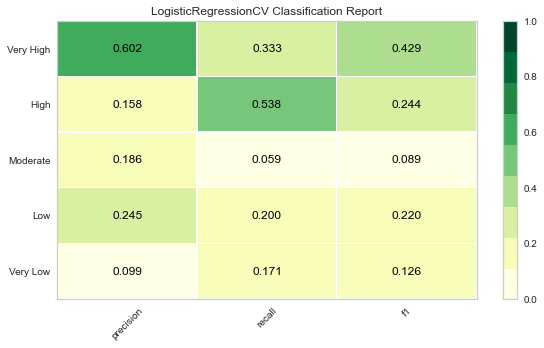

F1 SCORE BaggingClassifier: 1.0


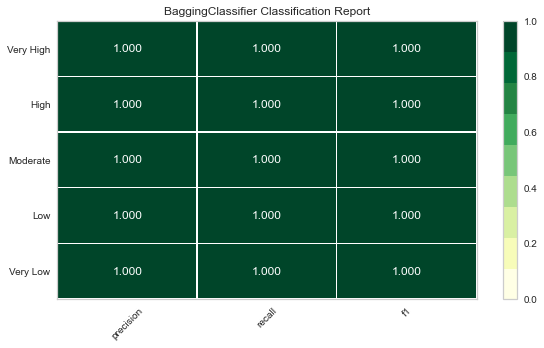

F1 SCORE ExtraTreesClassifier: 1.0


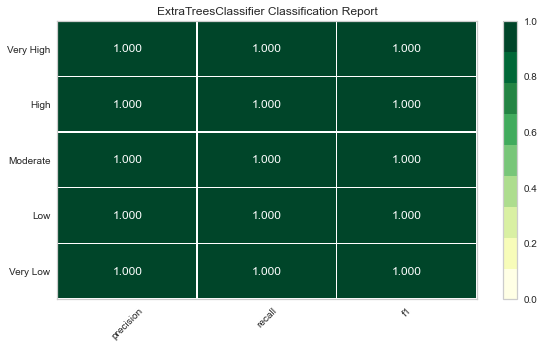

F1 SCORE RandomForestClassifier: 1.0


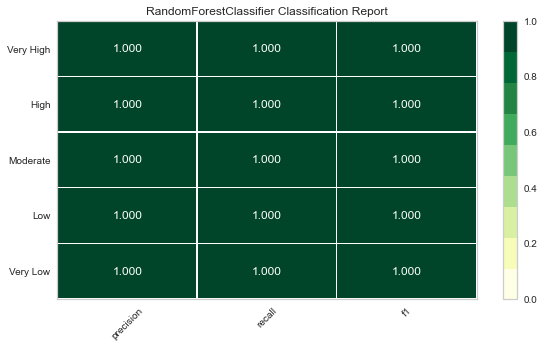

ACS Percent Data 
 Target = Child Opportunity Levels, social and economic domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.7865224077328646


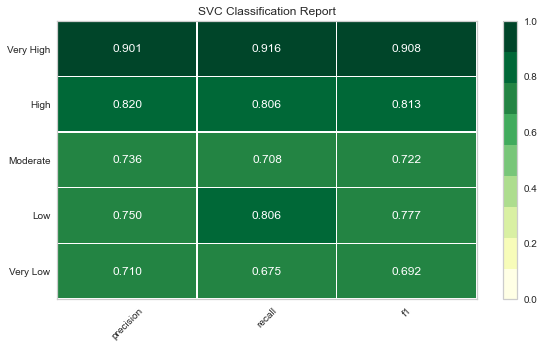

F1 SCORE NuSVC: 0.718585237258348


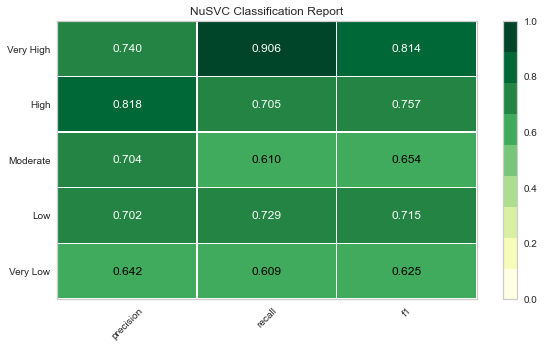

F1 SCORE LinearSVC: 0.7130382249560633


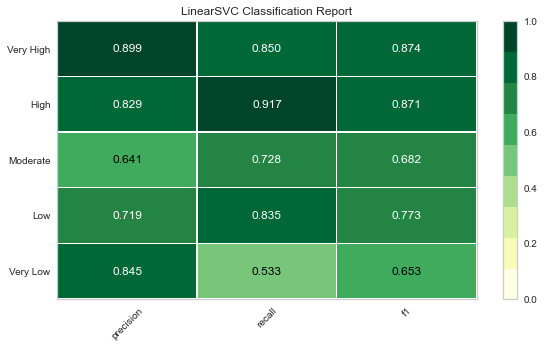

F1 SCORE SGDClassifier: 0.26268673110720564


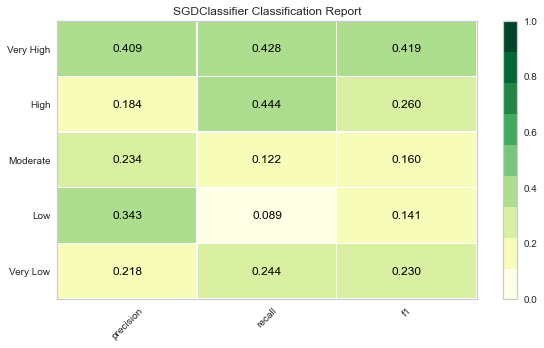

F1 SCORE KNeighborsClassifier: 0.7329745166959577


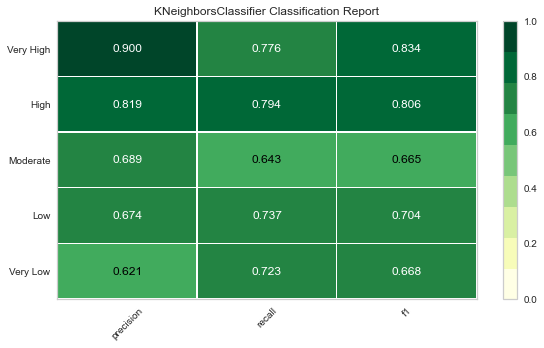

F1 SCORE LogisticRegression: 0.2825681019332162


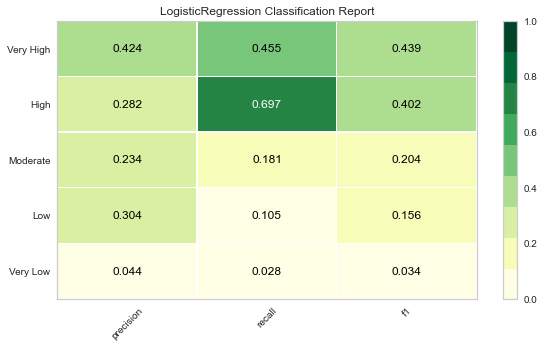

F1 SCORE LogisticRegressionCV: 0.2906414762741652


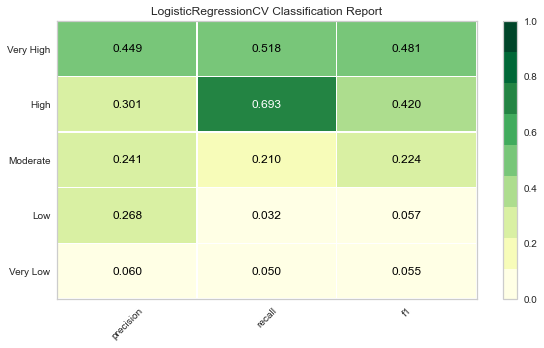

F1 SCORE BaggingClassifier: 1.0


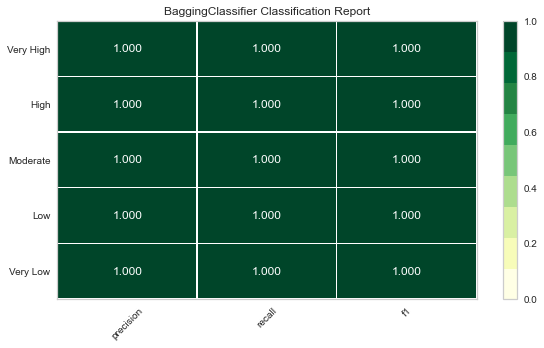

F1 SCORE ExtraTreesClassifier: 1.0


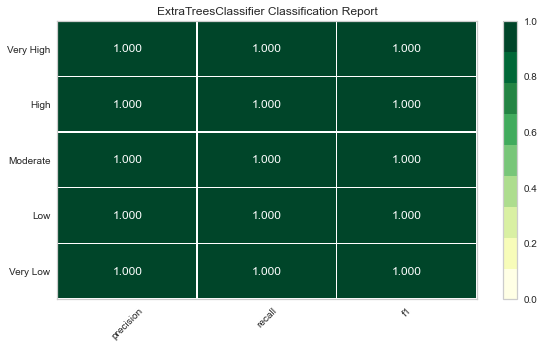

F1 SCORE RandomForestClassifier: 1.0


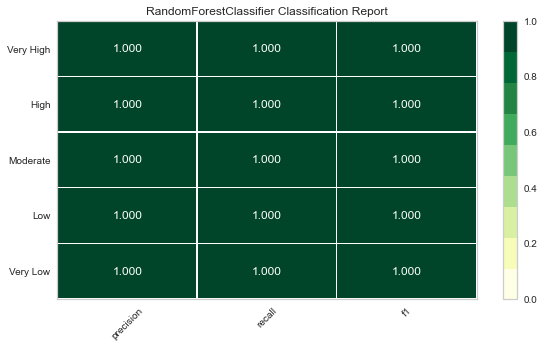

In [11]:
for i in cat_cols:
    X = pct.loc[:, pct.columns != i]
    y = pct[i]
    print('ACS Percent Data','\n','Target =', i)
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
            visualize_model(X, y, model)
        except:
            print("error in",model)

In [12]:
for i in num_cols:
    X = pct.loc[:, pct.columns != i]
    y = pct[i]
    print('ACS Percent Data','\n','Target =', i)
    train_test(X,y)
    for model in models:
        try:
            score_model(X, y, model)
        except:
            print("error in",model)

ACS Percent Data 
 Target = Child Opportunity Scores, education domain, nationally- normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.24736379613356765
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.19491432337434095
F1 SCORE SGDClassifier: 0.01257688927943761
F1 SCORE KNeighborsClassifier: 0.2548330404217926
F1 SCORE LogisticRegression: 0.01905755711775044
F1 SCORE LogisticRegressionCV: 0.0210896309314587
F1 SCORE BaggingClassifier: 0.9951120386643234
F1 SCORE ExtraTreesClassifier: 1.0
F1 SCORE RandomForestClassifier: 1.0
ACS Percent Data 
 Target = Child Opportunity Scores, health and environment domain, nationally-normed
(14566, 146) (14566,)
(3642, 146) (3642,)
F1 SCORE SVC: 0.2453317223198594
error in NuSVC(gamma='auto')
F1 SCORE LinearSVC: 0.2117750439367311
F1 SCORE SGDClassifier: 0.014224516695957822
F1 SCORE KNeighborsClassifier: 0.29734182776801404
F1 SCORE LogisticRegression: 0.028558875219683654
F1 SCORE LogisticRegressionCV: 0.02828427065026362
F1 SCORE 